https://pytorch.org/docs/stable/nn.html <br>
Non-linear_activation = Non-linear filter for transforming the original data to be a filtered form, e.g. can filter out noise.<br>
See e.g. https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU

In [25]:
import torch, torchvision
from torch import nn
from torch.nn import ReLU, Sigmoid
from torch.utils.data import DataLoader
from IPython.display import display
from torch.utils.tensorboard import SummaryWriter

In [20]:
input = torch.tensor([[1,-0.5],[-1,3]])
output = torch.reshape(input, (-1, 1, 2, 2))   # -1 means that this value will be calculated automatically by according to other parameters
                            #  batch, channel, dimension_x, dimension_y
print(output.shape)

torch.Size([1, 1, 2, 2])


In [21]:
class NLA(nn.Module):
    def __init__(self):
        super(NLA,self).__init__()
        self.relu1 = ReLU()  # implace = whether we modify the original data
        self.sigmoid1 = Sigmoid()
        
    def forward(self, input):
        output0 = self.relu1(input)
        output = self.sigmoid1(output0)
        return output

In [22]:
nla=NLA()
output = nla(input)
print(output)

tensor([[0.7311, 0.5000],
        [0.5000, 0.9526]])


Apply to a dataset as an example

In [23]:
dataset = torchvision.datasets.CIFAR10("..\P15_DataLoader\dataset", train=False, download=True, transform=torchvision.transforms.ToTensor())
dataloader = DataLoader(dataset, batch_size = 16)

Files already downloaded and verified


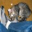

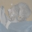

In [24]:
display(torchvision.transforms.ToPILImage()(list(dataloader)[0][0][0]))
nla=NLA()
output = nla(list(dataloader)[0][0][0])
display(torchvision.transforms.ToPILImage()(output))

upload images to tensorborad<br>
then type ' tensorboard --logdir="logs" ' in terminal to see the result. 

In [27]:
writer = SummaryWriter("logs")

step = 0
for data in dataloader:
    image, target = data
    writer.add_images("Non-linear_activations_original", image, step)
    writer.add_images("Non-linear_activations_modified", nla(image), step)
    step += 1
    
writer.close()
    